In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**Spades** Shipping company are engaged in maritime transportation services. They are 
the guys who basically move people's goods and services overseas from place to place. During an annual survey for maintenance and records track keeping, they realized  recurring dip in their revenue which has sparked questions about the company's performances. The company's Service Manager has decided to analyse their past data (2008 - 2012) when the company had experienced it's highest flow of positivity, to view the regressive patterns.


The following questions are to be answered by you to solve their regressive problems and help them make decisions:

<ol>
    <li>What shipping modes provided the highest and lowest profits and in what years ?</li>
    <li>What customer segments made the highest frequency / placed the most orders ?</li>
    <li>What products had the highest shipments ?</li>
    <li>Top 3 customers with the highest orders.</li>
</ol>



In [2]:
# Import and read the datasets

df = pd.read_excel('Orders-With Nulls.xlsx')
df.head()

,Order ID,Order Date,Order Quantity,Sales,Ship Mode,Profit,Unit Price,Customer Name,Customer Segment,Product Category
0,3,2010-10-13,6,261.5400,Regular Air,-213.250,38.94,Muhammed MacIntyre,Small Business,Office Supplies
1,6,2012-02-20,2,6.9300,Regular Air,-4.640,2.08,Ruben Dartt,Corporate,Office Supplies
2,32,2011-07-15,26,2808.0800,Regular Air,1054.820,107.53,Liz Pelletier,Corporate,Furniture
3,32,2011-07-15,24,1761.4000,Delivery Truck,-1748.560,70.89,Liz Pelletier,Corporate,Furniture
4,32,2011-07-15,23,160.2335,Regular Air,-85.129,7.99,Liz Pelletier,Corporate,Technology


In [3]:
# Display all the features

df.columns

Index(['Order ID', 'Order Date', 'Order Quantity', 'Sales', 'Ship Mode',
       'Profit', 'Unit Price', 'Customer Name', 'Customer Segment',
       'Product Category'],
      dtype='object')

In [4]:
# The dataset dimension

df.shape

(1007, 10)

In [5]:
# Basic information / property about each feature

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 10 columns):
Order ID            1007 non-null int64
Order Date          1007 non-null datetime64[ns]
Order Quantity      1007 non-null int64
Sales               999 non-null float64
Ship Mode           1007 non-null object
Profit              999 non-null float64
Unit Price          1007 non-null float64
Customer Name       1007 non-null object
Customer Segment    1007 non-null object
Product Category    1007 non-null object
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 78.8+ KB


In [6]:
# Checking for missing values

df.isnull().sum()

Order ID            0
Order Date          0
Order Quantity      0
Sales               8
Ship Mode           0
Profit              8
Unit Price          0
Customer Name       0
Customer Segment    0
Product Category    0
dtype: int64

only 16 missing values in total out of 1000+, so it's okay to drop them

In [7]:
# Dropping those missing values

df.dropna(inplace = True)

In [8]:
# No more missing values

df.isnull().sum()

Order ID            0
Order Date          0
Order Quantity      0
Sales               0
Ship Mode           0
Profit              0
Unit Price          0
Customer Name       0
Customer Segment    0
Product Category    0
dtype: int64

<b>1,i) What shipping modes provided the highest and lowest profits?</b>
---------------------------------------------------------------------------------------------------------

In [9]:
# Checking the frequency of the ship modes

df['Ship Mode'].value_counts()

# Regular air being the most frequently used mode of shipping, so there might be a possibilty
# of it having the highest profit

Regular Air       761
Delivery Truck    131
Express Air       107
Name: Ship Mode, dtype: int64

In [10]:
# Just an overview of the shipping modes and their profits

df[['Ship Mode', 'Profit']].head()

,Ship Mode,Profit
0,Regular Air,-213.250
1,Regular Air,-4.640
2,Regular Air,1054.820
3,Delivery Truck,-1748.560
4,Regular Air,-85.129


we discover there are ship modes with negative values, possibly meaning debts

In [11]:
# Summation of all profits for each ship mode

df.groupby('Ship Mode')['Profit'].agg('sum')

Ship Mode
Delivery Truck     66371.432396
Express Air        16363.627150
Regular Air       133962.589421
Name: Profit, dtype: float64

So essientially after the summation, Regular air has the highest profit but is it really accurate?

Let's try visualizing it

In [12]:
Del_total_profit = df.groupby('Ship Mode')['Profit'].agg('sum')[0]
Exp_total_profit = df.groupby('Ship Mode')['Profit'].agg('sum')[1]
Reg_total_profit = df.groupby('Ship Mode')['Profit'].agg('sum')[2]
All = [Del_total_profit, Exp_total_profit, Reg_total_profit]
Names = ['Delvery Truck', 'Exppress Air', 'Regular Air']

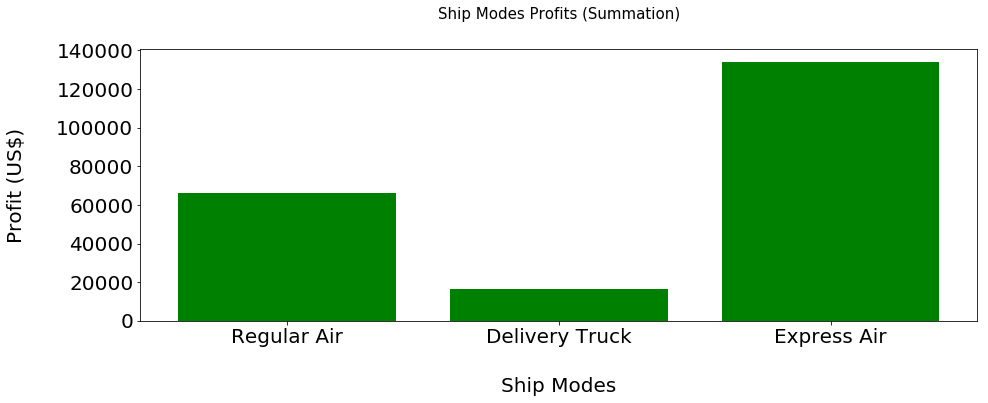

In [50]:
plt.title('Ship Modes Profits (Summation)', fontsize = 15, pad = 30)
plt.xlabel('Ship Modes', fontsize = 20, labelpad = 30)
plt.ylabel('Profit (US$)', fontsize = 20, labelpad = 30)
plt.rcParams['figure.figsize'] = (15, 5)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.bar(Names, All, color = 'green');

The total profits for each ship modes (WITH DEBTS INCLUDED) shows Regular Air with the highest profit but it's accuracy might be distorted due to those negative values.

Let's try to visualize the distribution of these negative and positive profits;



In [14]:
Regular = df[df['Ship Mode'] == 'Regular Air']

In [15]:
Regular_debt = Regular[Regular['Profit'] <= 0 ]

In [16]:
Regular_final = Regular_debt['Profit']

In [17]:
len(Regular_final)

# Slightly above have of the total Regular Air transactions are debts which might have \
# distorted the accuracy of it's profits total

382

In [18]:
Regular_profit = Regular[Regular['Profit'] > 0 ]

In [19]:
Regular_Profit_final = Regular_profit['Profit']

In [20]:
len(Regular_Profit_final)

# While the remaning profits without debts are about 49%

379

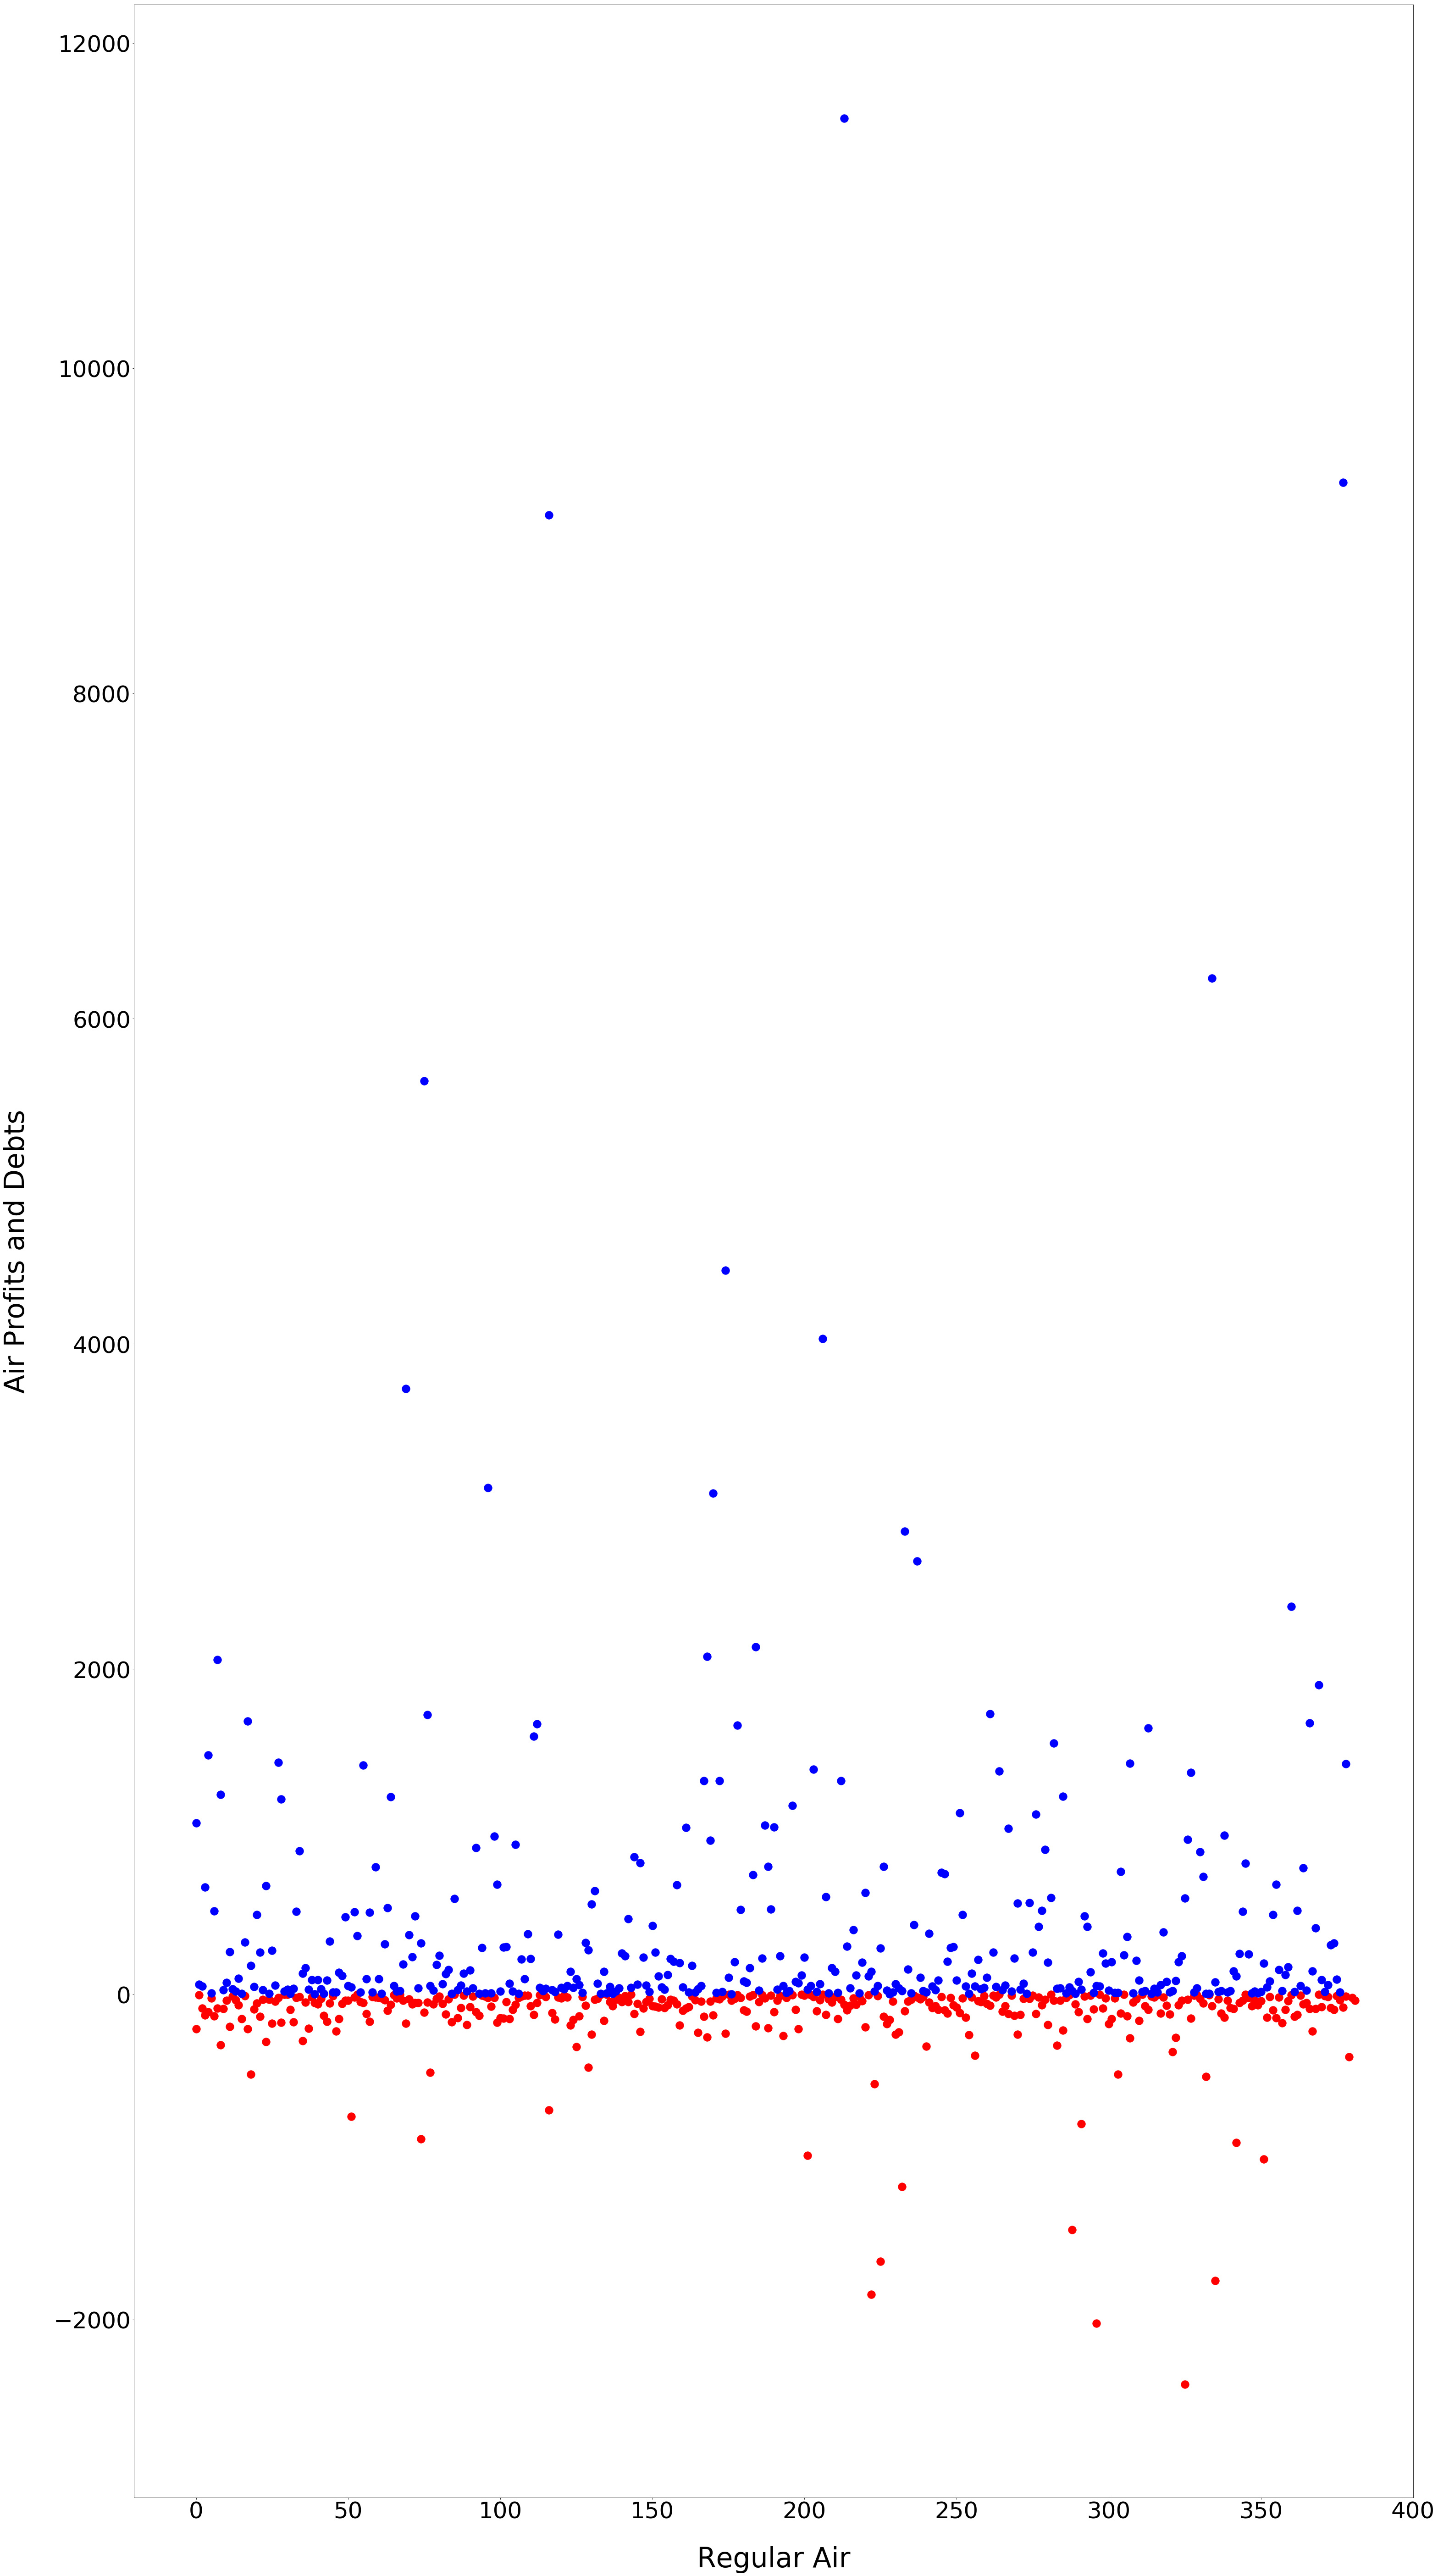

In [52]:
import numpy as np
plt.scatter(np.arange(len(Regular_final)), Regular_final, color = 'Red', s = 300);
plt.scatter(np.arange(len(Regular_Profit_final)), Regular_Profit_final,color = 'Blue', s= 300);
plt.rcParams['figure.figsize'] = (50, 100)
plt.ylabel('Profits and Debts', fontsize = 60, labelpad = 50)
plt.xlabel('Regular Air', fontsize = 60, labelpad = 50)
plt.xticks(fontsize = 50)
plt.yticks(fontsize = 50);

The above visualization might faintly show  most of its data points below the  0 point signifying debts which might seem less due to their uniformity along the 0 point axis. While the profits above the 0 points being more widely distibuted

------------------------------------------------------------------------------------

<b> But let's explore other centrality measures to find the most accurate result</b>

In [22]:
df.groupby('Ship Mode')['Profit'].mean()

Ship Mode
Delivery Truck    506.652156
Express Air       152.931095
Regular Air       176.034940
Name: Profit, dtype: float64

<b>The average profit of each ship mode shows Delivery Trucks have the highest profits</b>

In [23]:
df.groupby('Ship Mode')['Profit'].median()

Ship Mode
Delivery Truck   -187.29
Express Air         7.29
Regular Air        -0.06
Name: Profit, dtype: float64

<b>While the median shows Express Air has the highest profit on an medium level too</b>

---------------------------------------------------------------------

So essentially the central measures of mean and median does not tell us a precise accurate information needed so we'll analyse the negative values for each ship mode which is taken to be debt by <b>filtering</b> them from the total profit values

In [24]:
# A negative profit value signifies a debt which might inflate / deplate the profits

# So Checking the number of debts (negative values) of Regular Air Ship Mode

len(df[(df['Ship Mode'] == 'Regular Air') & (df.Profit < 0)])

382

In [25]:
# Checking the negative values of Delivery Truck

len(df[(df['Ship Mode'] == 'Delivery Truck') & (df.Profit < 0)])

76

In [26]:
# Checking the negative values for Express Air

len(df[(df['Ship Mode'] == 'Express Air') & (df.Profit < 0)])

49

<b>From the above three analysis;</b>
<ol>
    <li><b>Regular Air</b> has the most debts of 382 rounding off to about 51% of the total 761 transactions</li>
    <li><b>Delivery Trucks</b> has the second most debts with about 76 (58%) of its total 131 transactions</li>
    <li>While <b>Express Air</b> with the smallest number of debts 49 which covers 45% of its total transactions 107</li>
</ol>


<b>The next analysis is to calculate the number of profits without the debts</b>

In [27]:
# Number of Regular Air mode profits without debts

len(df[(df['Ship Mode'] == 'Regular Air') & (df['Profit'] > 0 )])

379

In [28]:
# Number of Delivery Truck mode profits without debts

len(df[(df['Ship Mode'] == 'Delivery Truck') & (df['Profit'] > 0 )])

55

In [29]:
# Number of Express Air mode profits without debts

len(df[(df['Ship Mode'] == 'Express Air') & (df['Profit'] > 0 )])

58

In [30]:
# Calculating the Profits for all ship modes minus their corresponding debts

# 999 --> All proifts + debts

# 379 + 55 + 58  = 492 --> Sum of all debts

# All profits(including debts)  - All profits (without debts)

# 999 - 492 = 507  --> Sum of all debts


------------------------------------------------------------------------------------------

<b>The previous steps explain;</b>

<ul>
    <li>The <b>total profits</b> for all ship modes <b>without debts</b> to be; 507</li>
    <li>The <b>total debts</b> for all ship modes to be; 492</li>
    <li><b>Regular Express</b> has made 379 profits out of the total 507, making about 75% of it</li>
    <li><b>Delivery Truck</b> made 55 profits out of the total 507, making just 10% of it</li>
    <li>While <b>Express Air</b> made 58 profits out of the total 507, covering approximately 11% of the total</li>
<ul>
    
-------------------------------------------------------------------------------------------

<b>To visualize this information</b>

In [31]:
Names = ['Regular Air', 'Delivery Truck', 'Express Air']

Reg = len(df[(df['Ship Mode'] == 'Regular Air') & (df['Profit'] > 0 )])
Del = len(df[(df['Ship Mode'] == 'Delivery Truck') & (df['Profit'] > 0 )])
Exp = len(df[(df['Ship Mode'] == 'Express Air') & (df['Profit'] > 0 )])

All_profits = [Reg, Del, Exp]

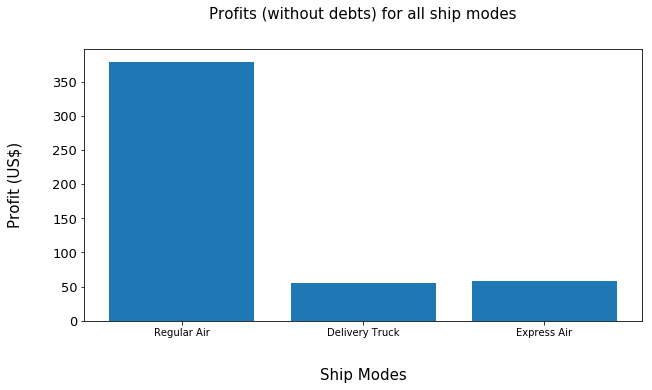

In [55]:
plt.title('Profits (without debts) for all ship modes', fontsize = 15, pad = 30)
plt.ylabel('Profit (US$)', fontsize = 15, labelpad = 30)
plt.yticks(fontsize = 13)
plt.xlabel('Ship Modes', fontsize = 15, labelpad = 30)
plt.yticks(fontsize = 13)
plt.rcParams['figure.figsize'] = (10, 5)
plt.bar(Names, All_profits);

-------------------------------------------------------------------------------------------

<b>Analysis conclusion;</b> 

<ol>
    <li>It's fair to conclude <b>Regular Air</b> having the most profits of all 3 ship modes with a long margin despite having about 50% debts. But also so do other ship modes. Advicable to figure out those debts and analyse their situtations.</li>
    <li>While <b>Delivery Truck</b> provided the lowest proift with only just 10% of the total profits</li>
</ol>

-------------------------------------------------------------------------------------------



<b>ii) What years provided the highest and lowest profits ?</b>
------------------------------------------------------------------------

In [33]:
df.head()

,Order ID,Order Date,Order Quantity,Sales,Ship Mode,Profit,Unit Price,Customer Name,Customer Segment,Product Category
0,3,2010-10-13,6,261.5400,Regular Air,-213.250,38.94,Muhammed MacIntyre,Small Business,Office Supplies
1,6,2012-02-20,2,6.9300,Regular Air,-4.640,2.08,Ruben Dartt,Corporate,Office Supplies
2,32,2011-07-15,26,2808.0800,Regular Air,1054.820,107.53,Liz Pelletier,Corporate,Furniture
3,32,2011-07-15,24,1761.4000,Delivery Truck,-1748.560,70.89,Liz Pelletier,Corporate,Furniture
4,32,2011-07-15,23,160.2335,Regular Air,-85.129,7.99,Liz Pelletier,Corporate,Technology


In [34]:
# Checking the date column

df['Order Date'].head()

0   2010-10-13
1   2012-02-20
2   2011-07-15
3   2011-07-15
4   2011-07-15
Name: Order Date, dtype: datetime64[ns]

The date column consists of the full date format of each order so to get a precise analysis yearly we have to extract only the 'year' from each full date

In [35]:
#Creating a column 'Years' and assigning just the year of each order

df['Years'] = df['Order Date'].dt.year

In [36]:
df.Years.unique()

array([2010, 2012, 2011, 2009])

All the unique values of the new 'Years' column.


In [37]:
df[['Ship Mode', 'Profit', 'Years']][df.Profit == df.Profit.max()]

# The Highest profit was made in 2009 by Regular air

,Ship Mode,Profit,Years
574,Regular Air,11535.282,2009


In [38]:
df[['Ship Mode', 'Profit', 'Years']][df.Profit == df.Profit.min()]

# While the biggest decline was made in 2012 by Delivery truck

,Ship Mode,Profit,Years
335,Delivery Truck,-4266.0885,2012


To visualilze this

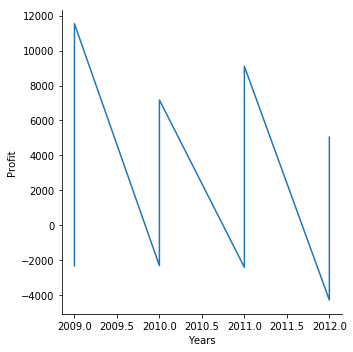

In [39]:
import seaborn as sns

sns.relplot('Years', 'Profit', data = df, kind = 'line', ci = None, estimator = None);

From the visual, The highest profits were made in 2009 while the biggest decline in 2012. But to make a clearer analysis based on each shipping mode

----------------------------------------------------------------------

<b> 2) What customer segment provided the highest orders?</b>
----------------------------------------------------------------------

----------------------------------------------------------------------

In [40]:
# Checking all the different values from the customer segment column

df['Customer Segment'].unique()

array(['Small Business', 'Corporate', 'Home Office', 'Consumer'],
      dtype=object)

In [56]:
df['Customer Segment'].value_counts(normalize = True)

# This statement calculates the frequency distribution for each Customer segement in a 
# percentage form

Corporate         0.382382
Home Office       0.236236
Consumer          0.203203
Small Business    0.178178
Name: Customer Segment, dtype: float64

<b>The above analysis;<b/>
    <ol>
        <li>Corporate had 382 of 999 total orders, making 38%</li>
        <li>Home Office had 236 of 999 total orders, making 25%</li>
        <li>Consumer had 203 of 999 total orders, making 20%</li>
        <li>Small business had 178 of 999 total orders, making 18%</li>
    </ol>

-------------------------------------------------------------------------
To visualize this data

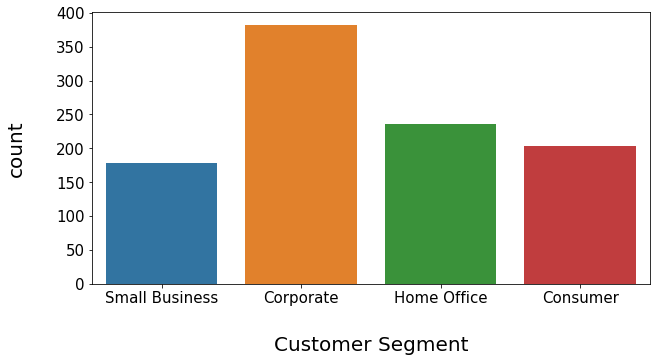

In [42]:
plt.xlabel('Customer Segment', fontsize = 20, labelpad = 30)
plt.ylabel('Count', fontsize = 20, labelpad = 30)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
sns.countplot(df['Customer Segment']);

From the above visual, it's clear Corporate provided the highest orders with over 350 orders


---------------------------------------------------------------------------------







<b>3) What products had the highest shipments ?</b>
--------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------




In [43]:
# All the unique items in the product category feature

df['Product Category'].unique()

array(['Office Supplies', 'Furniture', 'Technology'], dtype=object)

In [44]:
# A numeric summary of each product for every shipping mode

df.groupby('Ship Mode')['Product Category'].value_counts()

Ship Mode       Product Category
Delivery Truck  Furniture            94
                Technology           24
                Office Supplies      13
Express Air     Office Supplies      66
                Technology           27
                Furniture            14
Regular Air     Office Supplies     476
                Technology          187
                Furniture            98
Name: Product Category, dtype: int64

In [45]:
# Calculating the frequency distrition for each Product category against each ship mode

pd.crosstab(df['Product Category'], df['Ship Mode'], margins = 'index')

Ship Mode,Delivery Truck,Express Air,Regular Air,All
Product Category,,,,
Furniture,94,14,98,206
Office Supplies,13,66,476,555
Technology,24,27,187,238
All,131,107,761,999


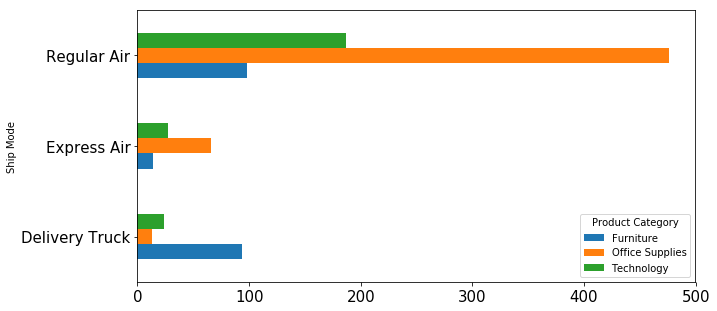

In [46]:
# And to visualize this

import math
pd.crosstab(df['Ship Mode'], df['Product Category']).plot(kind = 'barh');
plt.xticks(fontsize = 15);
plt.yticks(fontsize = 15);

From the above visual, Office Supplies seems to have the highest orders across two ship modes, having the largest order in Regular for over 450 orders. About 2 times higher than the second highest order of just below 200


-------------------------------------------------------------------------------------------

4) Top 3 customers with the highest orders. 
----------------------------------------------

In [47]:
# Length of the unique customer names

len(df['Customer Name'].unique())

430

Customer feature has about 430 unique names, so to find out the  frequency distribution of each

In [48]:
df['Customer Name'].value_counts().head()

# Using the head() function to give us only the top 5

Todd Boyes              10
Lela Donovan             9
Christopher Martinez     8
Patrick Jones            8
Roy Skaria               8
Name: Customer Name, dtype: int64

The above distribution shows the top 5 frequent customers with the last 3 having the same frequency.

<b>Top 3 customers</b>

<ol>
    <li><b>Todd Boyes</b> with the highest number of appearances <b>(10)</b></li>
    <li><b>Lela Donovan</b> coming second with <b>9</b> appearances</li>
    <li>While <b>Roy Skaria, Patrick Jones and Christopher Martinez </b> all with <b>8</b> appearances</li>
</ol>